# Data Extraction from Google Trends with Pytrends

Google Trends is a website by Google that analyzes the popularity of top search queries in Google Search across various regions and languages. The website uses graphs to compare the search volume of different queries over time.  
You can search for keywords on Google Trends to get useful information like:

- Interest over time: This shows how the search volume for a keyword has changed over time. You can use this information to see when people are most interested in a topic, or to track the popularity of a new product or event.  
- Related topics: This shows other topics that are often searched for together with the keyword you entered. This can be helpful for finding new information related to your topic of interest.  
- Related queries: This shows other search queries that are similar to the keyword you entered. This can be helpful for finding more specific information about your topic.

In [1]:
# imports

# if the pytrends is not installed then run the next line
# ! pip install pytrends

import pandas as pd
import numpy as np
from pytrends.request import TrendReq

# Create pytrends object
pytrends = TrendReq(hl='de-DE', tz=360)

In [2]:
# Set your keyword and time frame
keyword = ['Data Science'] # for example we give 'Data Science' as the search term 
timeframe = 'today 5-y'  # Time frame: last year

# Build the payload for the keyword
pytrends.build_payload(kw_list=keyword,
                       cat=0, # Category 
                       timeframe=timeframe,
                       geo='DE', # Geographic location, in this case 'Deutschland'
                       gprop='') # Google Search Property 

# Retrieve interest over time data
interest_over_time_df = pytrends.interest_over_time() # store the interest rate which is between 0 and 100
related_topics = pytrends.related_topics() # store related topics 
related_queries = pytrends.related_queries() # store related queries

dff = interest_over_time_df.reset_index() 
dff.drop('isPartial', axis=1, inplace= True)

In [17]:
# Let's print the dataframes 
dataframes = [interest_over_time_df, related_topics, related_queries, dff]
separator = "-" * 100  # This creates a line of dashes "--------------------"

for df in dataframes:
    print(df)
    print(separator)

            Data Science  isPartial
date                               
2018-09-02            40      False
2018-09-09            46      False
2018-09-16            38      False
2018-09-23            50      False
2018-09-30            51      False
...                  ...        ...
2023-07-23            78      False
2023-07-30            85      False
2023-08-06            68      False
2023-08-13            83      False
2023-08-20            73       True

[260 rows x 2 columns]
----------------------------------------------------------------------------------------------------
{'Data Science': {'rising':     value formattedValue                                               link  \
0   48700      Ausreißer  /trends/explore?q=/m/0127nzng&date=today+5-y&g...   
1   41300      Ausreißer  /trends/explore?q=/g/11rpqtj9p7&date=today+5-y...   
2   37200      Ausreißer  /trends/explore?q=/g/11bc5nk1tj&date=today+5-y...   
3   27300      Ausreißer  /trends/explore?q=/m/03zz3_&date=toda

 Now put each part of the data in a separate dataframe 

In [6]:
# related_topics
# Here we store each part of the related topics in separated dataframes
df_related_topics_rising = related_topics['Data Science']['rising']
df_related_topics_rising = df_related_topics_rising[['value', 'topic_title']]

df_related_topics_top = related_topics['Data Science']['top']
df_related_topics_top = df_related_topics_top[['value', 'topic_title']]

df_related_topics_rising = df_related_topics_rising.rename(columns={'value': 'Data Science_value',
                         'topic_title':'Data Science_topic'})
df_related_topics_top = df_related_topics_top.rename(columns={'value': 'Data Science_value',
                         'topic_title':'Data Science_topic'})


# related_queries
# Here we store each part of the related queries in separated dataframes
df_related_queries_rising = related_queries['Data Science']['rising']
df_related_queries_rising = df_related_queries_rising.rename(columns={'query': 'Data Science_query',
                         'value':'Data Science_query_value'})

df_related_queries_top = related_queries['Data Science']['top']
df_related_queries_top = df_related_queries_top.rename(columns={'query': 'Data Science_query',
                         'value':'Data Science_query_value'})

### Now I want to do the same for other keywords and merge their dataframes results to the ones for "Data Science"

In [19]:
Multiple_keywords = [
    "Artificial Intelligence",
    "Machine Learning",
    "Deep Learning",
    "Data Analytics",
    "Natural Language Processing",
    "Content Analysis",
    "Big Data",
    "Predictive Modeling",
    "Clustering",
    "Classification",
    "Regression",
    "Feature Extraction",
    "Data Visualization",
    "Dimensionality Reduction",
    "Text Mining",
    "Sentiment Analysis",
    "Tokenization",
    "Named Entity Recognition",
    "Topic Modeling",
    "Text Classification",
    "Information Retrieval",
    "Word Embeddings",
    "Data Preprocessing",
    "Feature Engineering",
    "Supervised Learning",
    "Unsupervised Learning",
    "Neural Networks",
    "Data Cleansing",
    "Exploratory Data Analysis"
]

In [20]:
keywords = Multiple_keywords
timeframe = 'today 5-y'  # Time frame: 5 last year

# Loop through the list of keywords in groups of 5
for i in range(0, len(keywords), 5):
    
    # Extract the next 5 keywords for this iteration
    keywords_5words = keywords[i:i+5]
    
    # Build a payload to request Google Trends data for the current 5 keywords
    pytrends.build_payload(kw_list=keywords_5words, cat=0, timeframe=timeframe, geo='DE', gprop='')
    
    # Fetch interest over time data and reset the index to get a DataFrame
    temp = pytrends.interest_over_time().reset_index()
    
    # Drop the 'isPartial' column from the DataFrame
    temp.drop('isPartial', axis=1, inplace=True)
    
    # Merge the fetched data with an existing DataFrame ('dff') based on the 'date' column
    dff = pd.merge(dff, temp, on="date")


In [21]:
# Now all the interest over time of 30 keywords are stored in dff
dff

,date,Data Science,Artificial Intelligence,Machine Learning,Deep Learning,Data Analytics,Natural Language Processing,Content Analysis,Big Data,Predictive Modeling,...,Text Classification,Information Retrieval,Word Embeddings,Data Preprocessing,Feature Engineering,Supervised Learning,Unsupervised Learning,Neural Networks,Data Cleansing,Exploratory Data Analysis
0,2018-09-02,40,20,59,28,19,4,5,64,3,...,30,25,21,0,0,36,0,62,0,0
1,2018-09-09,46,28,73,43,16,4,2,66,2,...,50,15,0,26,15,46,5,69,0,9
2,2018-09-16,38,27,71,41,18,4,4,66,0,...,34,12,0,0,0,46,8,49,7,0
3,2018-09-23,50,27,64,36,20,3,3,61,0,...,0,0,26,0,0,46,0,37,0,0
4,2018-09-30,51,20,69,40,19,1,0,64,0,...,27,0,30,0,0,38,0,66,8,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2023-07-23,78,51,79,34,24,5,1,40,0,...,24,12,23,0,23,43,18,60,0,4
256,2023-07-30,85,44,71,30,16,0,2,30,3,...,39,0,0,0,0,27,16,74,0,7
257,2023-08-06,68,36,77,31,21,5,3,26,0,...,26,25,12,0,0,36,10,66,0,7
258,2023-08-13,83,41,76,34,23,5,2,27,0,...,0,0,45,17,36,15,16,95,0,0


**Interest over time**   
Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

### Next let's do the same for other dataframes which are:
df_related_topics_rising  
df_related_topics_top  
df_related_queries_rising  
df_related_queries_top  


In [22]:
%%time

keywords = Multiple_keywords
# removing spaces in the elements of list
# keywords = [s.strip() for s in keywords]
timeframe = 'today 5-y'  # Time frame: 5 last year

for keyword in keywords:
    try:
        pytrends.build_payload(kw_list=[keyword], cat=0, timeframe=timeframe, geo='DE', gprop='')
        #Topics
        related_topics = pytrends.related_topics() 
        if not related_topics[keyword]['rising'].empty: # adding related_topics of each topic (top)
            rising = related_topics[keyword]['rising']
            rising = rising[['value', 'topic_title']]
            rising = rising.rename(columns={'value': f'{keyword}_value',
                                 'topic_title': f'{keyword}_topic'})
            df_related_topics_rising = pd.concat([df_related_topics_rising, rising], axis=1)

        if not related_topics[keyword]['top'].empty:  # adding related_topics of each topic  (rising)
            top = related_topics[keyword]['top']
            top = top[['value', 'topic_title']]
            top = top.rename(columns={'value': f'{keyword}_value',
                                 'topic_title': f'{keyword}_topic'})    
            df_related_topics_top = pd.concat([df_related_topics_top, top], axis=1)

        #----------------------------------------
        
        #Queries
        related_queries = pytrends.related_queries() 
        if related_queries[keyword]['rising'] is not None: # adding related_queries of each topic (rising)
            rising = related_queries[keyword]['rising']
            rising = rising.rename(columns={'query': f'{keyword}_query',
                                 'value': f'{keyword}_query_value'})
            df_related_queries_rising = pd.concat([df_related_queries_rising, rising], axis=1)

        if related_queries[keyword]['top'] is not None:  # adding related_queries of each topic  (top)
            top = related_queries[keyword]['top']
            top = top.rename(columns={'query': f'{keyword}_query',
                                 'value': f'{keyword}_query_value'})    
            df_related_queries_top = pd.concat([df_related_queries_top, top], axis=1)
    except requests.exceptions.Timeout:
        print("Timeout occured")
        


CPU times: total: 719 ms
Wall time: 50.3 s


### Related topics and queries

**Related topics**
Users searching for your term also searched for these topics. You can view by the following metrics:
* Top - The most popular topics. Scoring is on a relative scale where a value of 100 is the most commonly searched topic and a value of 50 is a topic searched half as often as the most popular term, and so on.

* Rising - Related topics with the biggest increase in search frequency since the last time period. Results marked "Breakout" had a tremendous increase, probably because these topics are new and had few (if any) prior searches.

**Related queries**
Users searching for your term also searched for these queries. You can sort by the following metrics:
* Top - The most popular search queries. Scoring is on a relative scale where a value of 100 is the most commonly searched query, 50 is a query searched half as often as the most popular query, and so on.

* Rising - Queries with the biggest increase in search frequency since the last time period. Results marked "Breakout" had a tremendous increase, probably because these queries are new and had few (if any) prior searches.


In [25]:
# Let's print the dataframes 
df_related_topics_rising.head()

,Data Science_value,Data Science_topic,Artificial Intelligence_value,Artificial Intelligence_topic,Machine Learning_value,Machine Learning_topic,Deep Learning_value,Deep Learning_topic,Data Analytics_value,Data Analytics_topic,...,Supervised Learning_value,Supervised Learning_topic,Unsupervised Learning_value,Unsupervised Learning_topic,Neural Networks_value,Neural Networks_topic,Data Cleansing_value,Data Cleansing_topic,Exploratory Data Analysis_value,Exploratory Data Analysis_topic
0,48700,IU International University of Applied Science...,303200,OGAW-Richtlinie,116900,deep,82800,NVIDIA GeForce RTX,56300,Microsoft,...,1095150,Selbstüberwachtes Lernen,299950,deep,330800,deep,307750.0,Alteryx,1830650,Python
1,41300,online,244100,DWS Group,44000,create,60700,NVIDIA,52700,Synapse,...,731950,Weak supervision,190400,Selbst,110650,Graph,295450.0,Wissenschaft,379450,Datenbasis
2,37200,IBM Deutschland GmbH,165600,WisdomTree Investment,25800,NVIDIA,58850,Transformer,43100,Log-Analyse,...,204450,GitHub,171200,Selbstüberwachtes Lernen,52200,CNN,271850.0,Data preparation,375250,GitHub
3,27300,Heinrich-Heine-Universität Düsseldorf,146400,Allianz Versicherung,3100,Lernen,52100,deep,39500,online,...,164850,PyTorch,150500,Keras,46300,create,269250.0,Python,362100,Data Preprocessing
4,19700,Framework,99200,MSCI,350,Sci-Hub,5500,Lernen,34900,Udemy,...,153250,Wissenschaft,147400,Weak supervision,45500,Neural Networks for Babies,237950.0,Migration,358700,Maschine


In [26]:
df_related_topics_top.head()

,Data Science_value,Data Science_topic,Artificial Intelligence_value,Artificial Intelligence_topic,Machine Learning_value,Machine Learning_topic,Deep Learning_value,Deep Learning_topic,Data Analytics_value,Data Analytics_topic,...,Supervised Learning_value,Supervised Learning_topic,Unsupervised Learning_value,Unsupervised Learning_topic,Neural Networks_value,Neural Networks_topic,Data Cleansing_value,Data Cleansing_topic,Exploratory Data Analysis_value,Exploratory Data Analysis_topic
0,100,Data Science,100,Künstliche Intelligenz,100,Maschinelles Lernen,100,Deep Learning,100,Daten,...,100,Überwachtes Lernen,100,Unüberwachtes Lernen,100,Künstliches neuronales Netz,100.0,Daten,100,Daten
1,96,Daten,98,Intelligenz,83,Maschine,43,Lernen,84,Analytisches Informationssystem,...,52,Lernen,46,Lernen,56,Nervenzelle,92.0,Datenbereinigung,94,Datenanalyse
2,91,Wissenschaft,6,Börsengehandelter Fonds,44,Lernen,21,deep,56,Datenanalyse,...,36,Unüberwachtes Lernen,35,Überwachtes Lernen,52,künstliches neuronales Netz,8.0,SAP,89,Explorative Datenanalyse
3,8,Master,5,Daten,10,Daten,14,Maschinelles Lernen,12,Big Data,...,29,Maschinelles Lernen,22,Maschinelles Lernen,17,Convolutional Neural Network,7.0,Data Science,51,Analyse
4,5,Python,5,Allianz SE,8,Python,10,Maschine,10,Google Analytics,...,20,Maschine,16,Maschine,14,Faltung,3.0,Reinigung,19,Python


In [27]:
df_related_queries_rising.head()

,Data Science_query,Data Science_query_value,Artificial Intelligence_query,Artificial Intelligence_query_value,Machine Learning_query,Machine Learning_query_value,Deep Learning_query,Deep Learning_query_value,Data Analytics_query,Data Analytics_query_value,...,Data Preprocessing_query,Data Preprocessing_query_value,Supervised Learning_query,Supervised Learning_query_value,Unsupervised Learning_query,Unsupervised Learning_query_value,Neural Networks_query,Neural Networks_query_value,Exploratory Data Analysis_query,Exploratory Data Analysis_query_value
0,devops,14950.0,dws artificial intelligence,250900,google colab,13850.0,deep mob learning,49800.0,google data analytics professional certificate,78950.0,...,google scholar,220650.0,contrastive learning,208500.0,self supervised learning,110050.0,neural networks for babies,43550.0,explorative datenanalyse,167850.0
1,zi data science lab,11250.0,wisdomtree artificial intelligence,161800,overleaf,12950.0,unet,23300.0,udemy,33500.0,...,NaN,NaN,what is machine learning,188900.0,unüberwachtes lernen,92450.0,scihub,37600.0,NaN,NaN
2,databricks,10700.0,wisdomtree artificial intelligence etf,145650,mlflow,11000.0,rtx 2080 ti,20100.0,snowflake,26350.0,...,NaN,NaN,pytorch,131900.0,clustering algorithms,82050.0,resnet,37100.0,NaN,NaN
3,freie universität berlin,10450.0,wisdomtree artificial intelligence ucits etf,104300,sci hub,9300.0,dive into deep learning,19400.0,process mining,21250.0,...,NaN,NaN,künstliche intelligenz,72950.0,deep learning vs machine learning,66100.0,chatgpt,30800.0,NaN,NaN
4,linked in,9350.0,xtrackers artificial intelligence and big data...,104150,amazon sagemaker,4500.0,google colab,18700.0,azure data explorer,15850.0,...,NaN,NaN,k-means,63150.0,maschinelles lernen,47900.0,feed forward neural network,27000.0,NaN,NaN


In [28]:
df_related_queries_top.head()

,Data Science_query,Data Science_query_value,Artificial Intelligence_query,Artificial Intelligence_query_value,Machine Learning_query,Machine Learning_query_value,Deep Learning_query,Deep Learning_query_value,Data Analytics_query,Data Analytics_query_value,...,Supervised Learning_query,Supervised Learning_query_value,Unsupervised Learning_query,Unsupervised Learning_query_value,Neural Networks_query,Neural Networks_query_value,Data Cleansing_query,Data Cleansing_query_value,Exploratory Data Analysis_query,Exploratory Data Analysis_query_value
0,data science master,100,ai artificial intelligence,100,python,100,machine learning,100,google analytics,100,...,unsupervised learning,100.0,supervised learning,100.0,deep neural networks,100,data cleaning,100.0,eda,100.0
1,python data science,67,ai,99,machine learning python,99,python,46,google data,100,...,machine learning,84.0,machine learning,65.0,neural network,80,NaN,NaN,explorative datenanalyse,32.0
2,python,67,etf artificial intelligence,44,deep learning,70,deep reinforcement learning,44,big data,93,...,self supervised learning,43.0,deep learning,42.0,convolutional neural networks,76,NaN,NaN,NaN,NaN
3,data science jobs,64,artificial intelligence global,40,google machine learning,46,reinforcement learning,43,data science,56,...,semi supervised learning,39.0,reinforcement learning,26.0,deep learning,54,NaN,NaN,NaN,NaN
4,machine learning,42,machine learning,32,what is machine learning,34,deep neural network,33,business analytics,52,...,reinforcement learning,31.0,clustering,23.0,graph neural networks,36,NaN,NaN,NaN,NaN


## Visualization

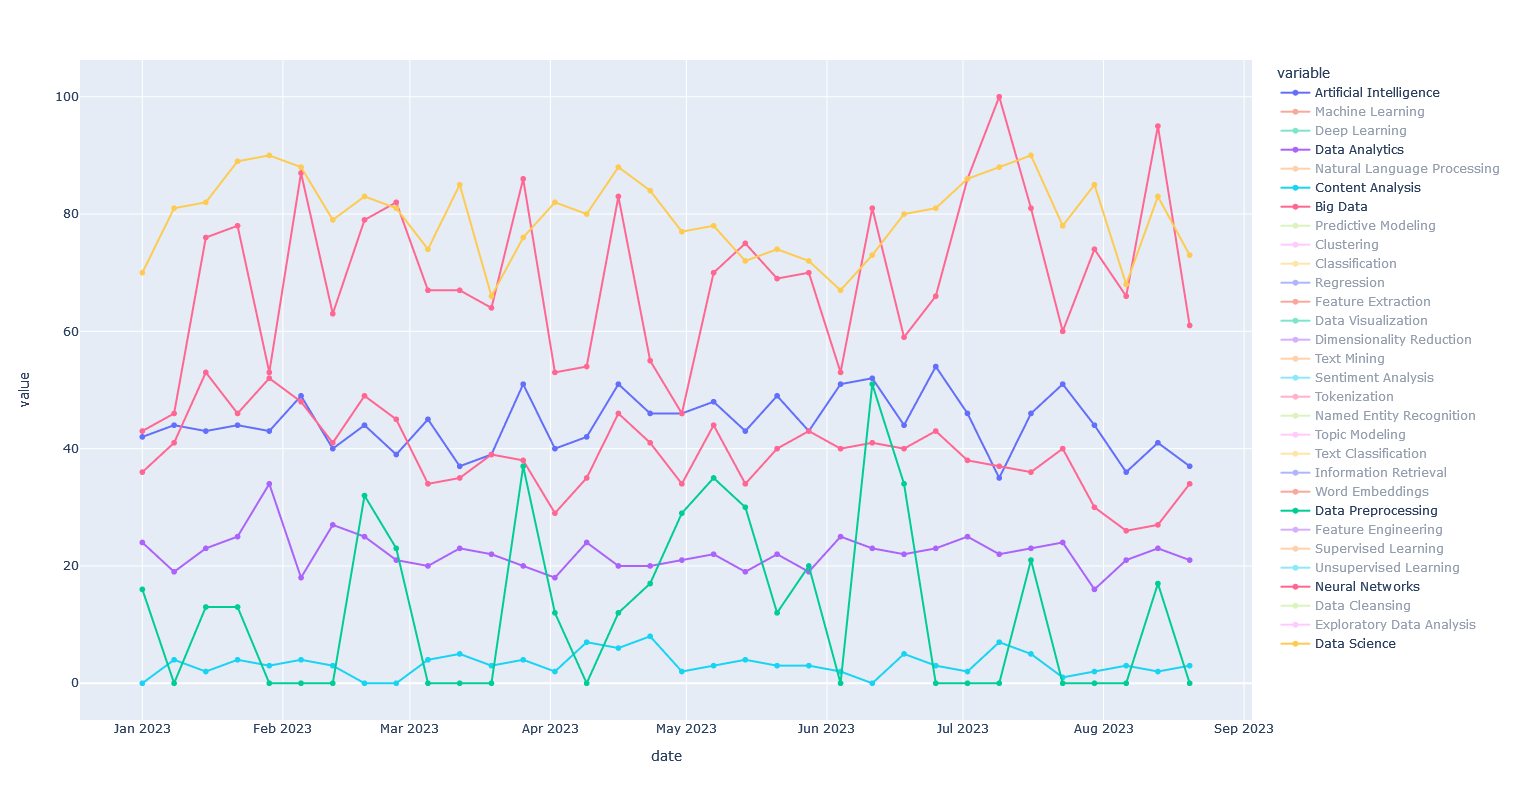

In [37]:
import plotly.express as px

dfp = dff.loc[dff.date>= '01.01.2023']

fig = px.line(dfp, x='date', y= Multiple_keywords, markers=True)

fig.update_layout(
    width=1600,  # Set the width of the graph in pixels
    height=800, # Set the height of the graph in pixels
)

fig.show()

The graph above might be very complicated to read, but thanks to the Ploty we can hover over each column name and hide them

In my view, such information is of great value because it allows us to explore how different and similar topics have been researched over time and in different places. They also facilitate the identification of trends, parallels, and convergences among these topics.

   
      
      
reference: https://trends.google.com/trends/explore?q=Data%20Science&date=now%201-d&geo=DE&hl=en